### This is a quick analysis to look at the most differentially expressed genes in interesting clusters and draw some plots

In [1]:
library(data.table)
library(Seurat)
library(ggplot2)
options(Seurat.object.assay.version = "v5")

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [2]:
outdir <- '~/working/combined'
s_obj <- readRDS(file=file.path(outdir, 'integrated.rds'))

In [4]:
s_obj

An object of class Seurat 
50042 features across 19108 samples within 2 assays 
Active assay: SCT (20479 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, integrated.cca, integrated.harmony

#### Work with Harmony integration, as it looks like it's given the best seperation
- with the caveat that this needs work to validateDimPlot(rna, label = TRUE)

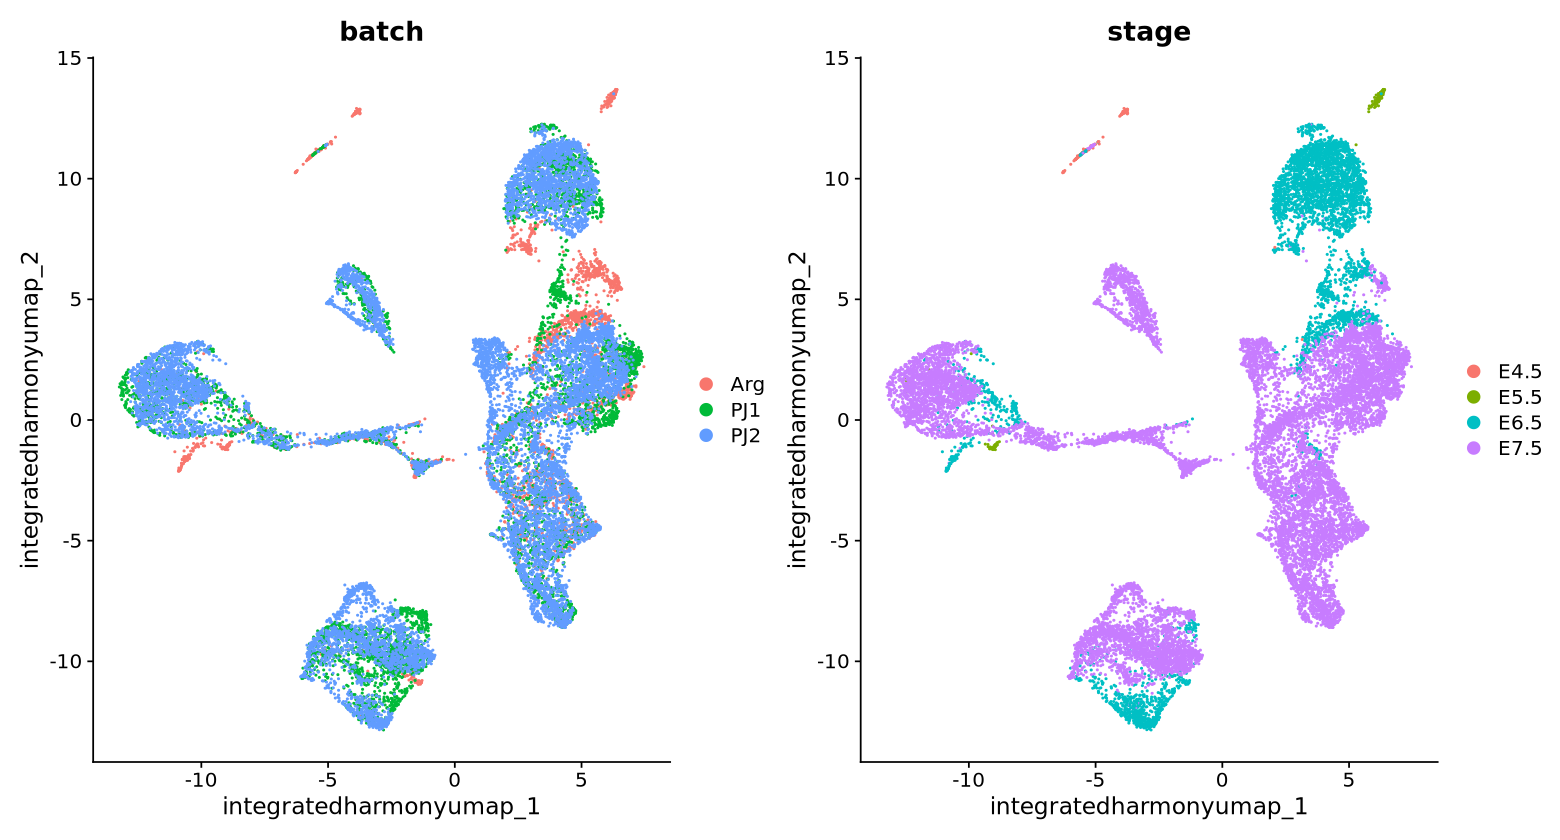

In [7]:
options(repr.plot.width = 13, repr.plot.height = 7)
DimPlot(s_obj, reduction = "integrated.harmonyumap", group.by = c("batch", "stage"))

#### Examine the clustering

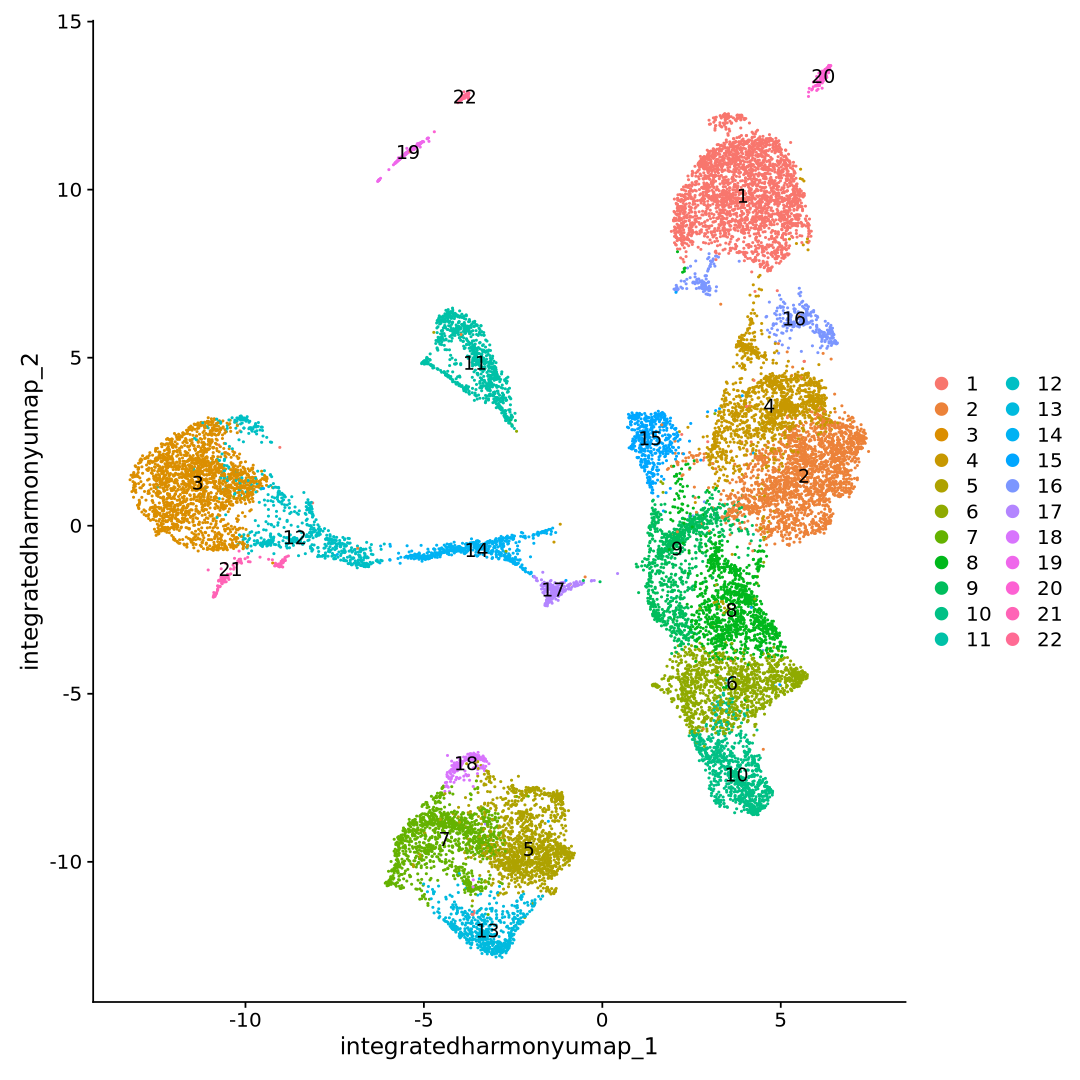

In [9]:
options(repr.plot.width = 9, repr.plot.height = 9)
DimPlot(s_obj, reduction = "integrated.harmonyumap", label = TRUE)

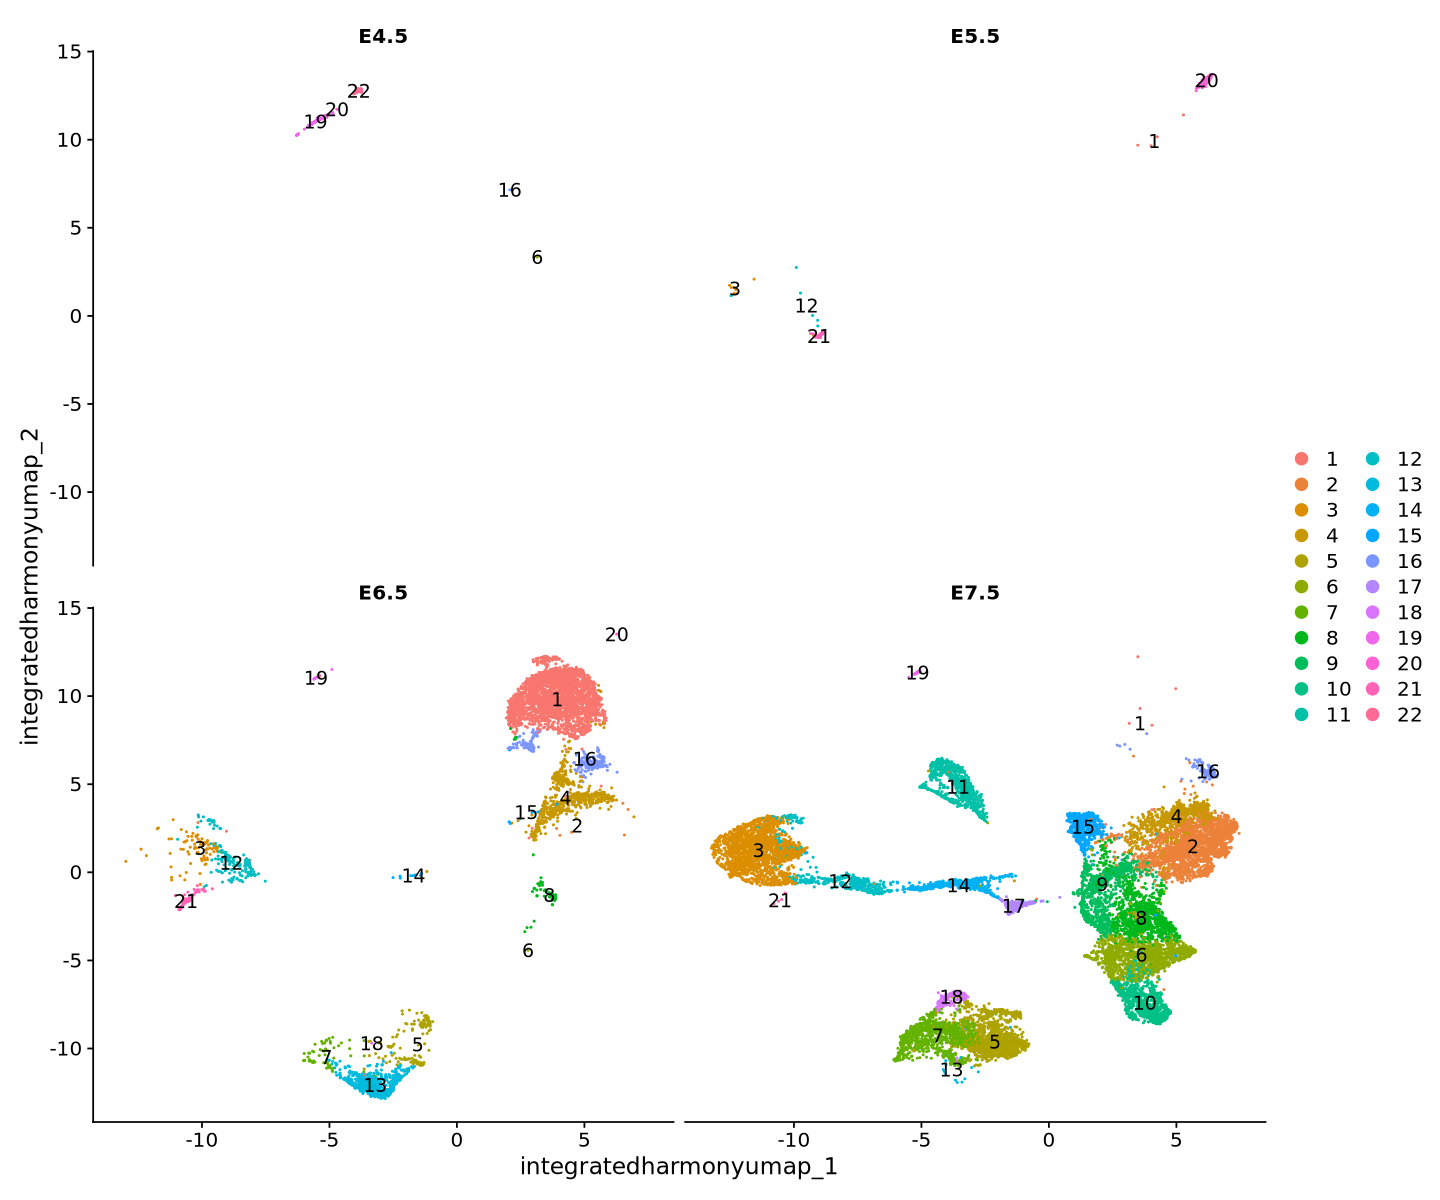

In [19]:
options(repr.plot.width = 12, repr.plot.height = 10)
DimPlot(s_obj, reduction = "integrated.harmonyumap", label = TRUE, split.by='stage',ncol=2)

Find differential genes (between clusters)
- then plot a few of interest: Cluter 22 is E4.5-only, Clusters 1 and 13 are dominant at E6.5, but transient.

In [21]:
s_obj

An object of class Seurat 
50042 features across 19108 samples within 2 assays 
Active assay: SCT (20479 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 6 dimensional reductions calculated: pca, integrated.cca, integrated.harmony, pcaumap, integrated.ccaumap, integrated.harmonyumap

In [23]:
head(s_obj@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,pass_rnaQC,stage,reported_celltype,paper,batch,nCount_SCT,nFeature_SCT,pca.leiden,seurat_clusters,integrated.cca.leiden,integrated.harmony.leiden
,<chr>,<dbl>,<int>,<lgl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>
E6.5_Plate1_E9,E6.5,1850080,6938,TRUE,E6.5,ExE_ectoderm,Arg,Arg,716753,6766,21,5,3,5
E7.5_Plate1_F9,E7.5,750940,1624,TRUE,E7.5,Epiblast,Arg,Arg,716317,1621,18,16,1,16
E6.5_Plate1_D9,E6.5,3122822,6740,TRUE,E6.5,ExE_ectoderm,Arg,Arg,716982,6461,21,5,3,5
E7.5_Plate1_C9,E7.5,891632,1995,TRUE,E7.5,Mesoderm,Arg,Arg,716799,1979,19,6,5,6
E6.5_Plate1_G9,E6.5,1276353,8118,TRUE,E6.5,ExE_ectoderm,Arg,Arg,716470,8050,21,5,3,5
E6.5_Plate1_F9,E6.5,809622,7888,TRUE,E6.5,ExE_ectoderm,Arg,Arg,716173,7872,21,5,3,5


In [3]:
s_obj <- PrepSCTFindMarkers(s_obj)

Found 3 SCT models. Recorrecting SCT counts using minimum median counts: 14160.5



In [4]:
# Find markers using SCT-normalized data, comparing Harmony-allocated clusters
sct_markers <- FindAllMarkers(object = s_obj, assay = "SCT", recorrect.umi = FALSE,
                              only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25, group.by = 'integrated.harmony.leiden'
                             )

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20

Calculating cluster 21

Calculating cluster 22



In [46]:
# Get top 9 in cluster 22 - obviously this is proof of concept
sct_markers <- data.table(sct_markers)
sct_markers[,cluster:=as.character(sct_markers[,cluster])]
setorder(sct_markers, -avg_log2FC)
top9_22 <- head(sct_markers[cluster=='22'], 9)

In [47]:
top9_22

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0,12.059869,0.487,0.000,0,22,ENSMUSG00000050435
0,11.191113,0.590,0.000,0,22,ENSMUSG00000030365
0,10.535448,0.474,0.000,0,22,ENSMUSG00000092622
0,9.368707,0.923,0.004,0,22,ENSMUSG00000022652
0,9.322903,0.346,0.001,0,22,ENSMUSG00000046133
0,9.284223,0.782,0.002,0,22,ENSMUSG00000074830
0,8.850415,0.603,0.002,0,22,ENSMUSG00000030359
0,8.731277,0.410,0.001,0,22,ENSMUSG00000024209
0,8.660979,0.718,0.003,0,22,ENSMUSG00000051747


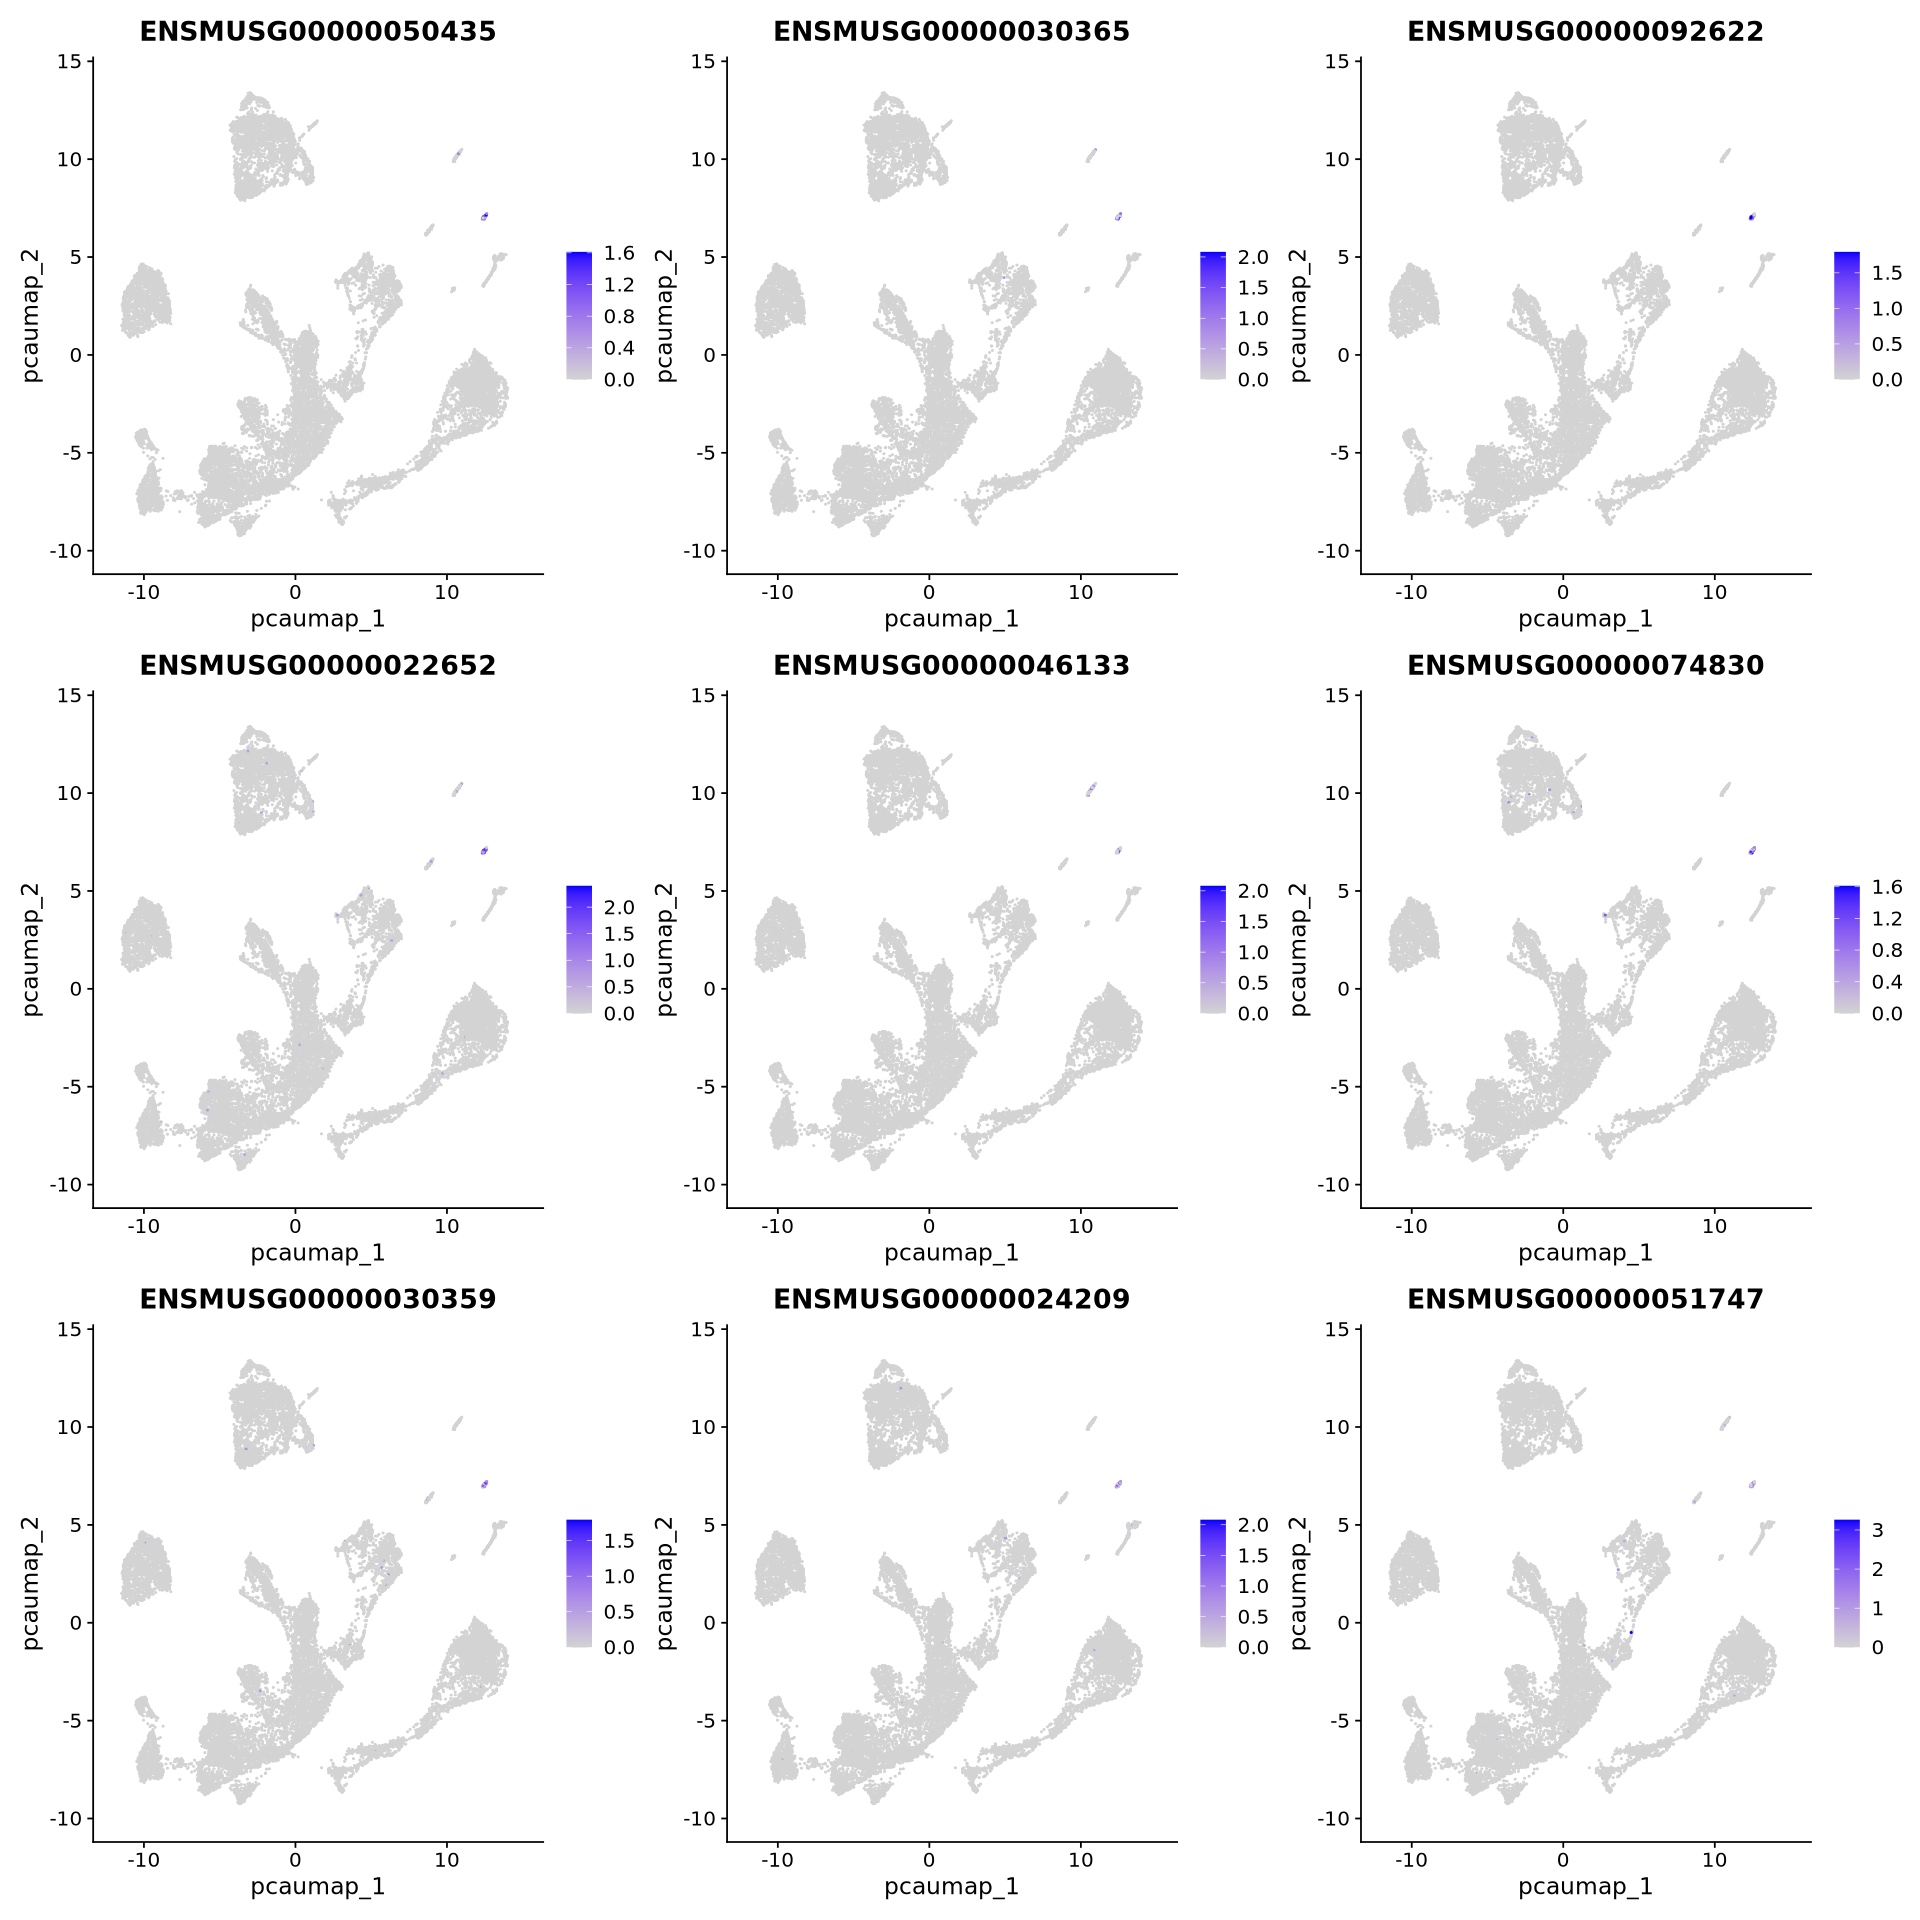

In [48]:
options(repr.plot.width = 16, repr.plot.height = 16)
FeaturePlot(s_obj, features = top9_22[['gene']])

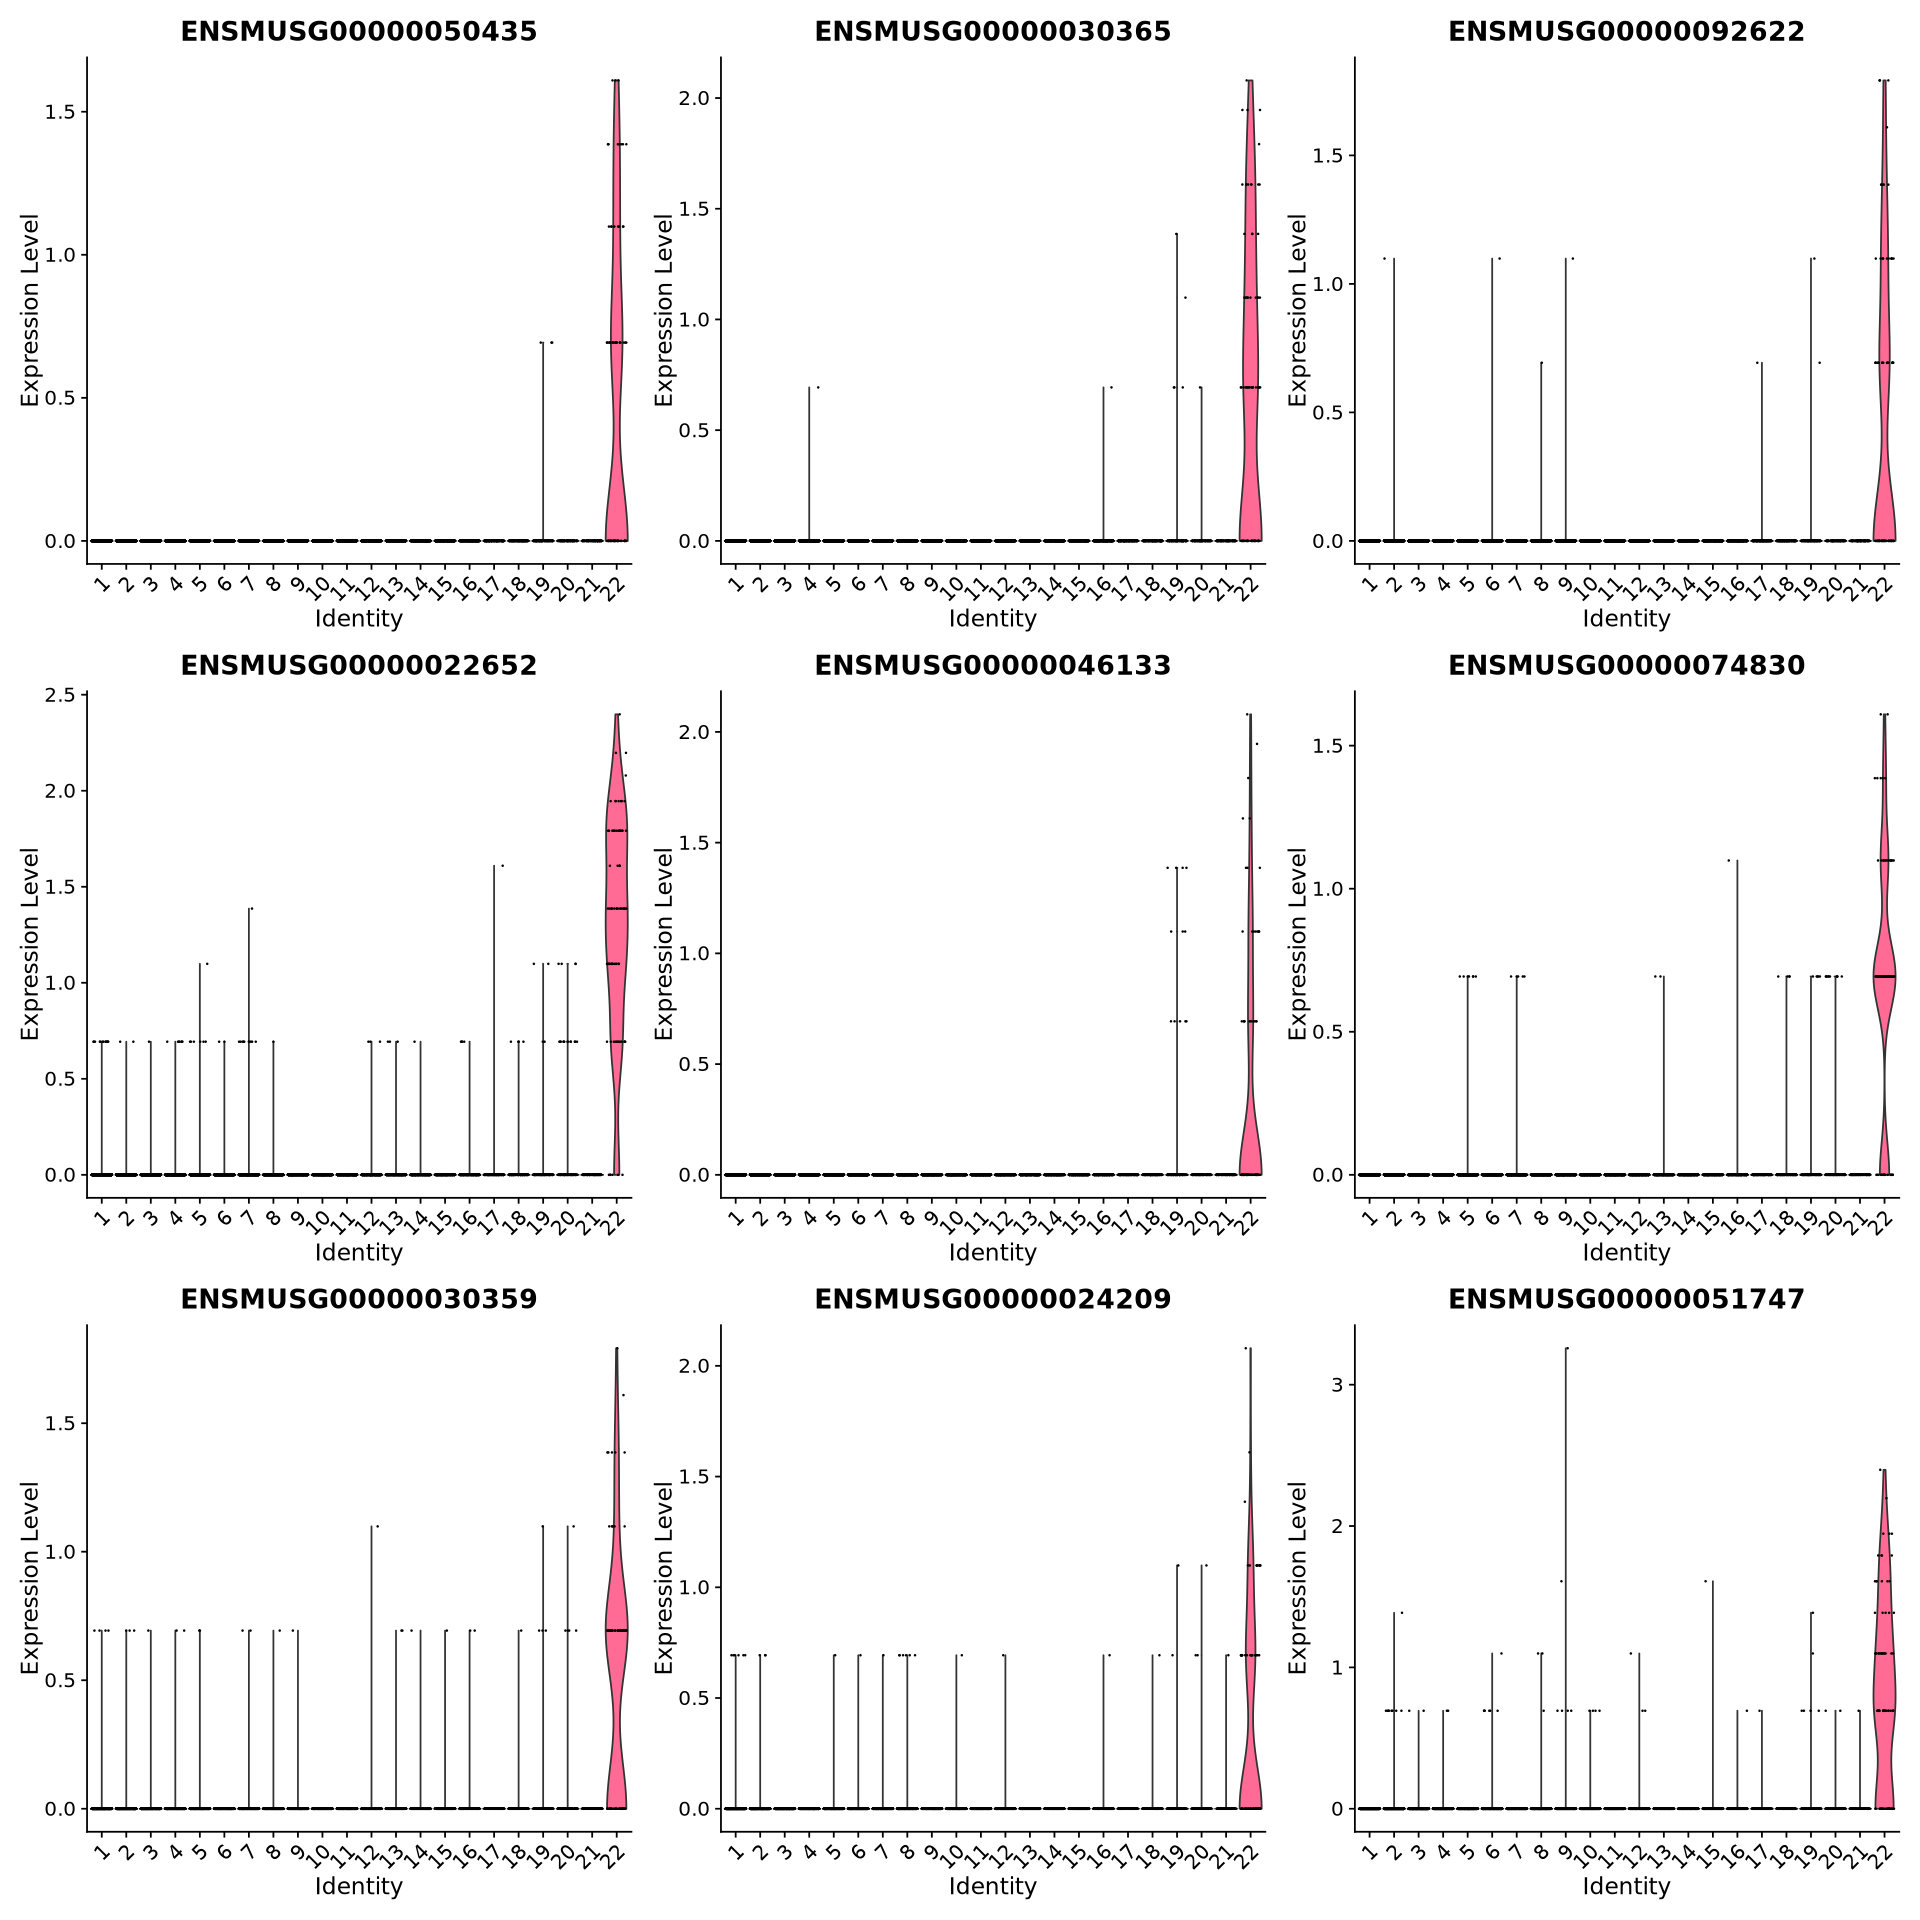

In [49]:
options(repr.plot.width = 16, repr.plot.height = 16)
VlnPlot(s_obj, features = top9_22[['gene']])

#### Future directions:
1. Experiment with cluster resolution (looks, OK, but could maybe be a bit lower)
2. MUCH more work on differential expression, and linking to cluster and stage.
1. Compare with the cell labels given in the paper (in the object metadata)
2. Annotate from gene atlas data (using Azimuth)
3. Explore variable genes much more, and investigate their biological significance (start by converting
emsebl IDs to gene IDs)